# Regresión Lineal multivariada

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes


Primero vamos a inicializar un dataset genérico utilizando `make_regression` de ScikitLearn

In [2]:
X, y, coef = make_regression(
    n_samples=100,
    n_features=10,
    noise=10,
    random_state=1,
    n_informative=8,
    bias=10,
    coef=True,
    effective_rank=2
)

In [3]:
coef

array([13.96493337,  0.        , 97.1820073 ,  1.47437909, 89.60434916,
       99.85205071,  0.        , 97.27203529,  7.34666544,  7.05420447])

In [4]:
data = pd.DataFrame(X, columns=['feature'+str(i) for i in range(1,11)])

data['target'] = y

In [5]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,target
0,-0.025217,-0.058615,-0.031047,0.030334,0.103959,0.067602,-0.038114,0.094764,0.055326,0.027379,26.390790
1,0.035856,0.012557,-0.101901,0.001711,-0.017188,0.016473,-0.003342,-0.015463,0.006063,-0.073407,3.871841
2,0.037031,0.080603,-0.092250,-0.009187,0.033069,-0.030604,0.055992,0.004711,-0.060120,-0.111125,-3.615505
3,-0.031072,-0.091823,0.065086,0.000826,-0.084587,-0.006284,0.054608,0.001646,0.108040,0.133746,-15.566287
4,-0.000801,-0.016398,0.021035,-0.017475,0.021170,-0.036904,0.009286,0.081633,-0.013737,0.102084,21.992379
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.008648,0.049870,-0.025969,0.016653,0.041033,-0.025156,0.032535,0.058834,-0.000874,-0.056922,18.089868
96,0.009222,0.033203,-0.029247,0.000149,0.007559,-0.001143,-0.012155,-0.017292,0.056850,-0.018714,5.110993
97,0.024623,-0.047069,0.022903,0.000270,-0.036302,-0.044344,0.086280,0.077781,0.111950,0.109056,10.492971
98,0.025096,-0.016677,0.020031,0.010058,0.062752,-0.014612,-0.034936,0.021011,-0.079376,-0.026148,15.688729


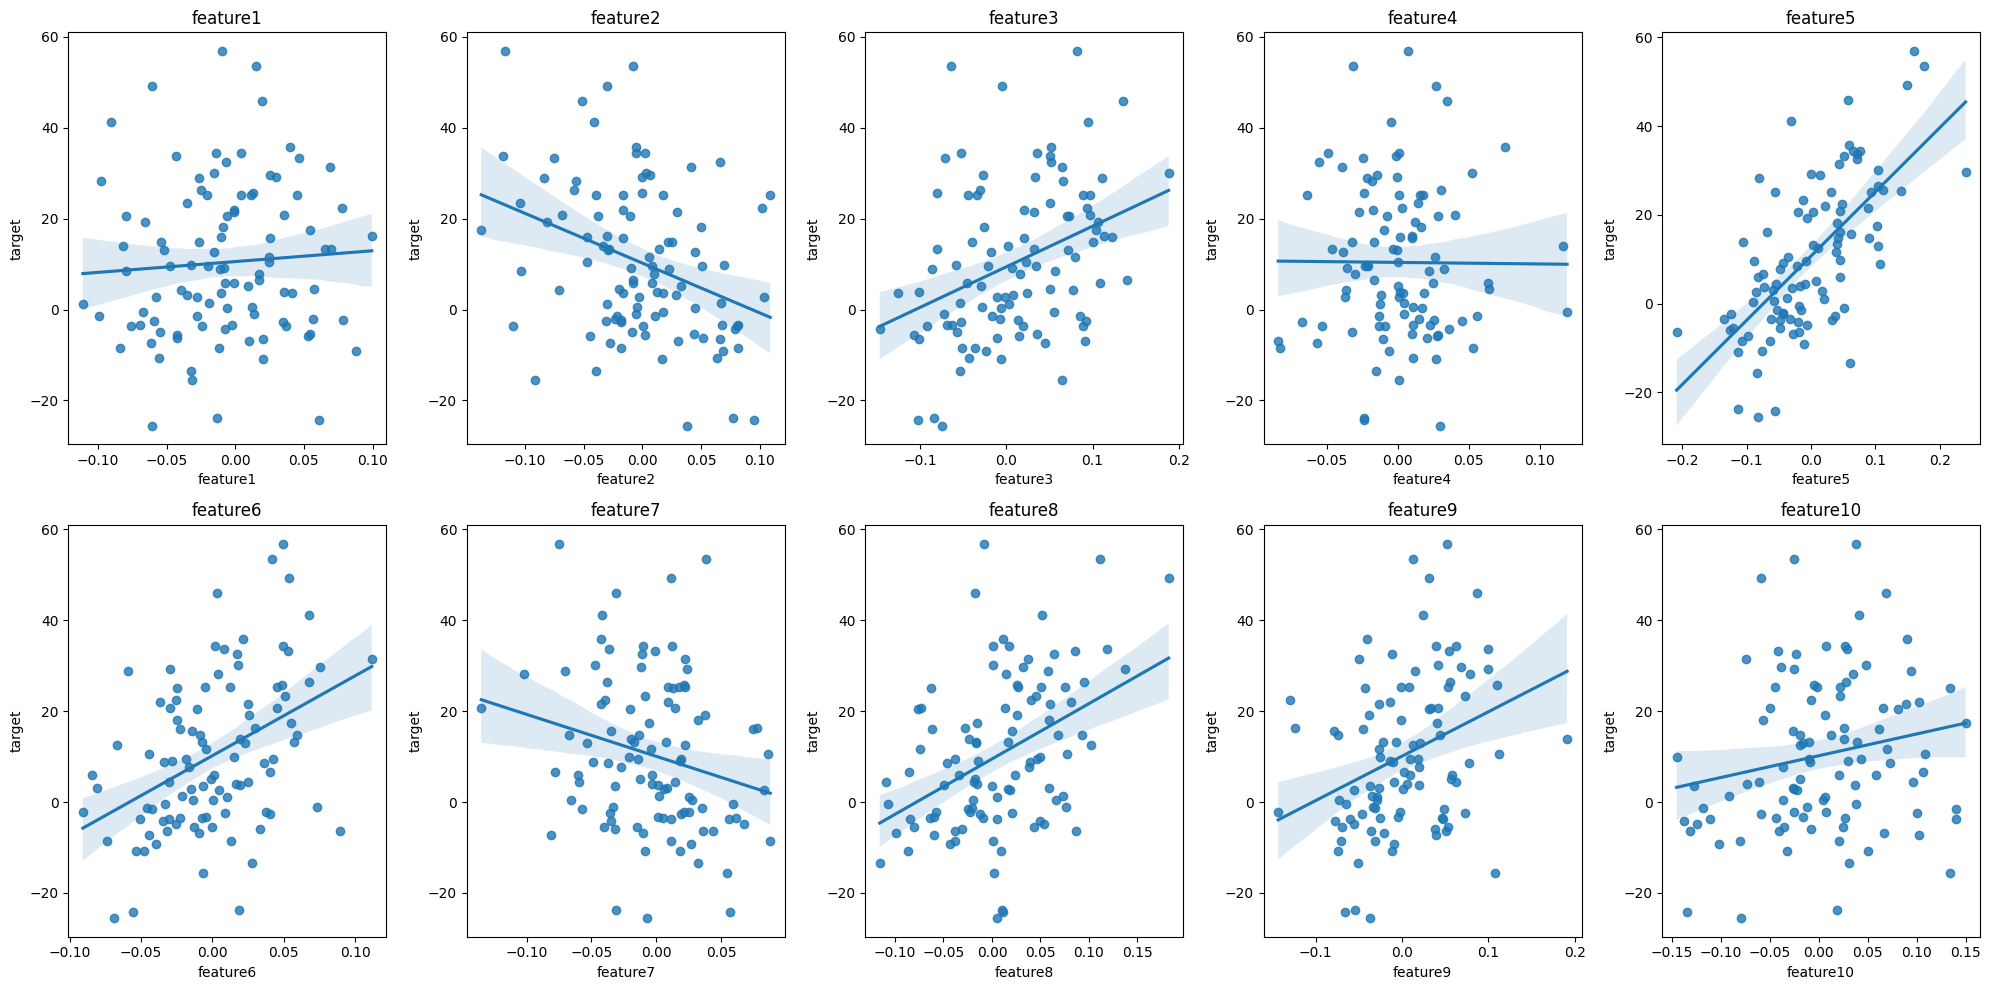

In [6]:
## create a plot that contains 10 subplots, 1 for each feature
## each subplot should be a scatterplot of the feature vs the target

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    sns.regplot(data=data, x='feature'+str(i+1), y='target', ax=ax)
    ax.set_title('feature'+str(i+1))

plt.tight_layout()
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,target
0,-0.025217,-0.058615,-0.031047,0.030334,0.103959,0.067602,-0.038114,0.094764,0.055326,0.027379,26.390790
1,0.035856,0.012557,-0.101901,0.001711,-0.017188,0.016473,-0.003342,-0.015463,0.006063,-0.073407,3.871841
2,0.037031,0.080603,-0.092250,-0.009187,0.033069,-0.030604,0.055992,0.004711,-0.060120,-0.111125,-3.615505
3,-0.031072,-0.091823,0.065086,0.000826,-0.084587,-0.006284,0.054608,0.001646,0.108040,0.133746,-15.566287
4,-0.000801,-0.016398,0.021035,-0.017475,0.021170,-0.036904,0.009286,0.081633,-0.013737,0.102084,21.992379
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.008648,0.049870,-0.025969,0.016653,0.041033,-0.025156,0.032535,0.058834,-0.000874,-0.056922,18.089868
96,0.009222,0.033203,-0.029247,0.000149,0.007559,-0.001143,-0.012155,-0.017292,0.056850,-0.018714,5.110993
97,0.024623,-0.047069,0.022903,0.000270,-0.036302,-0.044344,0.086280,0.077781,0.111950,0.109056,10.492971
98,0.025096,-0.016677,0.020031,0.010058,0.062752,-0.014612,-0.034936,0.021011,-0.079376,-0.026148,15.688729


In [9]:
lr_sk = LinearRegression()

lr_sk.fit(data.drop('target', axis=1), data['target'])

LinearRegression()

In [10]:
lr_sk.coef_

array([  9.78857975,  14.23382748,  98.06558227,  28.57575222,
       103.1177688 ,  64.6878471 ,  -1.65064168,  90.79161705,
        51.44945462,   2.97046402])

In [11]:
lr_sk.intercept_

8.759028398522155

In [12]:
lr_sk.score(data.drop('target', axis=1), data['target'])

0.7107572999823009

In [13]:
## En este modelo estamos considerando una regresion SIN ordenada al origen.
lr_stats = sm.OLS(data['target'], data.drop('target', axis=1)).fit()

In [14]:
lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.567
Method:                 Least Squares   F-statistic:                              14.11
Date:                Sat, 04 Nov 2023   Prob (F-statistic):                    1.15e-14
Time:                        23:32:38   Log-Likelihood:                         -393.03
No. Observations:                 100   AIC:                                      806.1
Df Residuals:                      90   BIC:                                      832.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature1     -15.2971     30.638     -0.499      0.619     -76.166      45.572
feature2      25.6123     33.531      0.764      0.447     -41.003      92.228
feature3     124.4970     23.720      5.249      0.000      77.374     171.620
feature4      30.7098     38.050      0.807      0.422     -44.884     106.303
feature5      92.8082     20.659      4.492      0.000      51.766     133.850
feature6      73.2238     35.977      2.035      0.045       1.750     144.698
feature7     -10.9495     33.995     -0.322      0.748     -78.486      56.587
feature8     122.0262     27.282      4.473      0.000      67.826     176.226
feature9      46.4450     29.125      1.595      0.114     -11.418     104.308
feature10      3.3514     28.479      0.118      0.907     -53.227      59.929
==============================================================================
Omnibus:                        1.604   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.052
Skew:                           0.163   Prob(JB):                        0.591
Kurtosis:                       3.383   Cond. No.                         3.14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
lr_stats.rsquared

0.6105770454677993

In [16]:
lr_stats.params

feature1     -15.297056
feature2      25.612260
feature3     124.496952
feature4      30.709779
feature5      92.808157
feature6      73.223835
feature7     -10.949487
feature8     122.026170
feature9      46.444975
feature10      3.351362
dtype: float64

In [17]:
## Si queremos agregar una ordenada al origen, debemos agregar una columna de 1s
data_copy = data.copy()

data_copy['intercept'] = 1

lr_stats = sm.OLS(data_copy['target'], data_copy.drop('target', axis=1)).fit()

lr_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     21.87
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           5.71e-20
Time:                        23:32:38   Log-Likelihood:                -361.99
No. Observations:                 100   AIC:                             746.0
Df Residuals:                      89   BIC:                             774.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature1       9.7886     22.769      0.430      0.668     -35.452      55.029
feature2      14.2338     24.754      0.575      0.567     -34.952      63.420
feature3      98.0656     17.746      5.526      0.000      62.806     133.326
feature4      28.5758     28.053      1.019      0.311     -27.164      84.316
feature5     103.1178     15.276      6.750      0.000      72.765     133.470
feature6      64.6878     26.541      2.437      0.017      11.952     117.424
feature7      -1.6506     25.084     -0.066      0.948     -51.492      48.191
feature8      90.7916     20.427      4.445      0.000      50.203     131.380
feature9      51.4495     21.480      2.395      0.019       8.770      94.129
feature10      2.9705     20.995      0.141      0.888     -38.747      44.688
intercept      8.7590      1.001      8.752      0.000       6.770      10.748
==============================================================================
Omnibus:                        1.503   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.024
Skew:                           0.222   Prob(JB):                        0.599
Kurtosis:                       3.221   Cond. No.                         31.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Test de bondad de ajuste

Aqui vamos a utilizar el test F basado en la tabla ANOVA para determinar si el modelo es significativo o no.

In [18]:
## Importamos la libreria que nos quedo pendiente para calcular el estadiatico F.

from scipy.stats import f_oneway

In [19]:
# tomamos el modelo de sklearn y calculamos el estadistico F
# Para ello vamos a tener que armar los elementos de la tabla ANOVA.

# 1. Calculamos la suma de cuadrados de los residuos

rss = np.sum((data['target'] - lr_sk.predict(data.drop('target', axis=1)))**2)

# 2. Calculamos la suma de cuadrados de la regresion

tss = np.sum((data['target'] - data['target'].mean())**2)

# 3. Calculamos la suma de cuadrados total

ess = np.sum((lr_sk.predict(data.drop('target', axis=1)) - data['target'].mean())**2)

# 4. Calculamos los grados de libertad de los residuos

df_res = data.shape[0] - data.shape[1]

# 5. Calculamos los grados de libertad de la regresion

df_reg = data.shape[1] - 1

# 6. Calculamos los grados de libertad total

df_total = data.shape[0] - 1

# 7. Calculamos el estadistico F

f = (ess/df_reg) / (rss/df_res)

In [20]:
rss, tss, ess, df_res, df_reg, df_total, f

(8160.655125288496,
 28213.8671945364,
 20053.212069247897,
 89,
 10,
 99,
 21.87000733105933)

In [21]:
# Ahora fijamos un nivel de significancia y calculamos el p-valor

alpha = 0.05

p_value = 1 - f_oneway(data['target'], lr_sk.predict(data.drop('target', axis=1)))[1]

p_value

0.0

In [26]:
assert f > p_value